# **Tarefa 2**: Álgebra Linear e Otimização para ML -  MO431A
Universidade Estadual de Campinas (UNICAMP), Instituto de Computação (IC)

Prof. Jacques Wainer, 2021s1

In [1]:
# RA & Name
print('265673: ' + 'Gabriel Luciano Gomes')
print('192880: ' + 'Lucas Borges Rondon')
print('265674: ' + 'Paulo Júnio Reis Rodrigues')

265673: Gabriel Luciano Gomes
192880: Lucas Borges Rondon
265674: Paulo Júnio Reis Rodrigues


### Imports necessários

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import LogNorm
import tensorflow as tf

## Equação Rosenbrock 2D


In [3]:
# função fx de Rosenbrock em 2D
def fx(x1, x2):
    return ((1 - x1)**2) + 100*((x2 - x1**2)**2)

### Formato da função

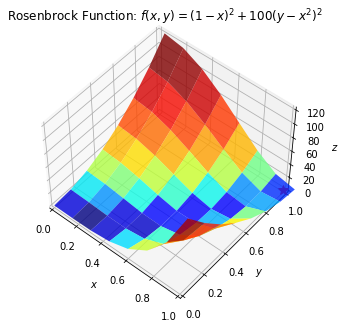

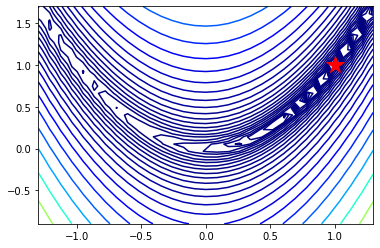

In [4]:
xmin, xmax, xstep = 0, 1, .15
ymin, ymax, ystep = 0, 1, .15

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = fx(x, y)

minima = np.array([1, 1])
minima_ = minima.reshape(-1, 1)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

plt.title(r'Rosenbrock Function: $f(x,y) = (1-x)^2 + 100(y-x^2)^2$ ')

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, fx(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

_, ax = plt.subplots(1, 1)
# make a contour plot of the rosenbrock function surface.
X, Y = np.meshgrid(np.linspace(-1.3, 1.3, 31), np.linspace(-0.9, 1.7, 31))
Z = fx(X, Y)
ax.plot(*minima_, 'r*', markersize=18)
ax.contour(X, Y, Z, np.logspace(-1, 3, 31), cmap=plt.cm.jet)

ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-0.9, 1.7)
plt.show()


### Função gradiente de f

In [5]:
# derivada parcial de fx em x
def dx(x1, x2):    
    return 2 * (200*x1**3 - 200*x1*x2 + x1 -1)

# derivada parcial de fx em y
def dy(x1, x2):
    return 200*(x2 - x1**2)

### Plot das informações

In [6]:
def plotInfo(points, steps):    
    newList = [(elem1, elem2) for elem1, elem2 in points]
    plt.title(r'Values of $f$(x)')
    plt.plot(*zip(*newList))
    plt.show()

    path = np.array(newList).T

    _, ax = plt.subplots(1, 1)
    # make a contour plot of the rosenbrock function surface.
    X, Y = np.meshgrid(np.linspace(-1.3, 1.3, 31), np.linspace(-0.9, 1.7, 31))
    Z = fx(X, Y)
    ax.plot(*minima_, 'r*', markersize=18)
    ax.contour(X, Y, Z, np.logspace(-1, 3, 31), cmap=plt.cm.jet)
    ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], 
        scale_units='xy', angles='xy', scale=100, color='red', width= 0.015)

    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-0.9, 1.7)
    plt.show()
    
    
    print(f'Best value of x: {points[len(points)-1]}')
    print(f'Number os steps: {steps}')

### L.r = 1.e-3

In [7]:
x = 0.0
y = 0.0
points = [np.array([x, y])]

tol = 1
steps = 0
lr = 10**-3

while (tol > 10**-5) and (steps < 50000):
    # Compute function to old point
    f_old = fx(x, y)
    
    # Compute gradient and new point
    x -= lr * dx(x, y)
    y -= lr * dy(x, y)
    
    # Compute function to new point
    f_new = fx(x, y)   
    
    # Compute tolerancy        
    tol = np.abs(f_new - f_old)
    
    # Append current point to list
    points.append(np.array([x, y]))
    
    steps+=1  
    
print(f'Valor da tolerância: {tol}, Valor de passos: {steps}')

Valor da tolerância: 9.998940970952844e-06, Valor de passos: 2842


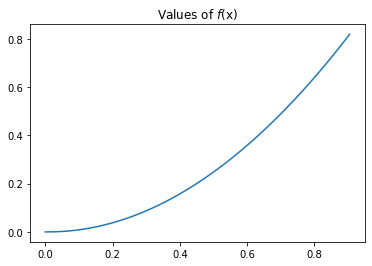

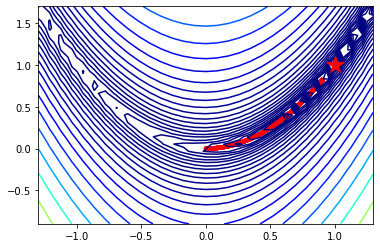

Best value of x: [0.90489266 0.81845007]
Number os steps: 2842


In [8]:
plotInfo(points, steps)

### L.r = 1.e-4

In [9]:
x = 0.0
y = 0.0
points = [np.array([x, y])]

tol = 1
steps = 0
lr = 10**-4

while (tol > 10**-5) and (steps < 50000):
    # Compute function to old point
    f_old = fx(x, y)
    
    # Compute gradient and new point
    x -= lr * dx(x, y)
    y -= lr * dy(x, y)
    
    # Compute function to new point
    f_new = fx(x, y)   
    
    # Compute tolerancy        
    tol = np.abs(f_new - f_old)
    
    # Append current point to list
    points.append(np.array([x, y]))
    
    steps+=1  
    
print(f'Valor da tolerância: {tol}, Valor de passos: {steps}')

Valor da tolerância: 9.999994764961495e-06, Valor de passos: 12346


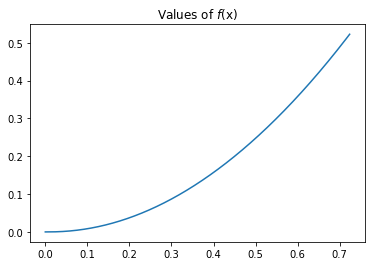

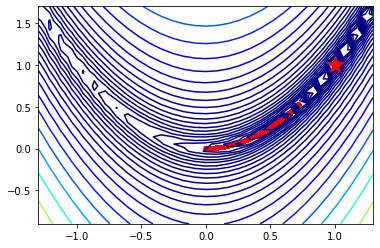

Best value of x: [0.72373005 0.5225001 ]
Number os steps: 12346


In [10]:
plotInfo(points, steps)

### L.r grande

In [11]:
x = 0.0
y = 0.0
points = [np.array([x, y])]

tol = 1
steps = 0
lr = 8**-2

while (tol > 10**-5) and (steps < 50000):
    # Compute function to old point
    f_old = fx(x, y)
    
    # Compute gradient and new point
    x -= lr * dx(x, y)
    y -= lr * dy(x, y)
    
    # Compute function to new point
    f_new = fx(x, y)   
    
    # Compute tolerancy        
    tol = np.abs(f_new - f_old)
    
    # Append current point to list
    points.append(np.array([x, y]))
    
    steps+=1  
    
print(f'Valor da tolerância: {tol}, Valor de passos: {steps}')

OverflowError: (34, 'Result too large')

### Politica de redução do l.r

In [12]:
x = 0.0
y = 0.0
points = [np.array([x, y])]

tol = 1
steps = 0
lr = 3**-5

while (tol > 10**-5) and (steps < 50000):
    # Compute function to old point
    f_old = fx(x, y)
    
    # Compute gradient and new point
    x -= lr * dx(x, y)
    y -= lr * dy(x, y)
    
    # Compute function to new point
    f_new = fx(x, y)   
    
    # Compute tolerancy        
    tol = np.abs(f_new - f_old)
    
    # Append current point to list
    points.append(np.array([x, y]))
    
    # Updating learning rate
    lr = lr * 0.999
    
    steps+=1  
    
print(f'Valor da tolerância: {tol}, Valor de passos: {steps}')

Valor da tolerância: 9.985739491158961e-06, Valor de passos: 919


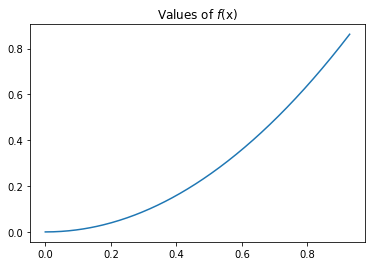

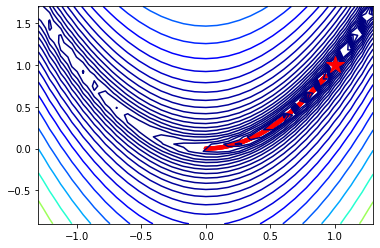

Best value of x: [0.92901798 0.86280725]
Number os steps: 919


In [13]:
plotInfo(points, steps)

### Utilizando Tensorflow para calcular o gradiente

In [14]:
points = [np.array([0.0, 0.0])]

x = tf.Variable(0.0)
y = tf.Variable(0.0)

tol = 1
steps = 0

lr = 3**-5

while (tol > 10**-5) and (steps < 50000):
    
    # Compute function to old point
    f_old = fx(x, y).numpy()
    
    # Computing gradient with TensorFlow
    with tf.GradientTape(persistent=True) as g:
      g.watch([x,y])
      # Rosenbrock function        
      z = (1-x)**2 + 100*((y-x**2)**2) 
    
    # Generatin new point
    # Multiply gradient by learning rate    
    x.assign_sub(lr * g.gradient(z, x).numpy())
    y.assign_sub(lr * g.gradient(z, y).numpy())
    
    # Compute function to new point
    f_new = fx(x, y).numpy()    
    
    # Compute tolerancy
    tol = abs(f_new - f_old)
    
    # Append current point to list
    points.append(np.array([x, y])) 
    
    # Updating learning rate
    lr = lr * 0.999
    
    steps += 1

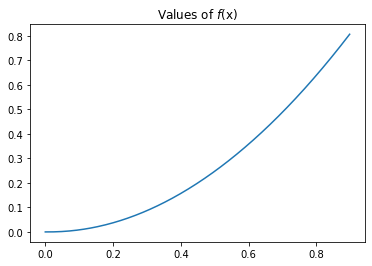

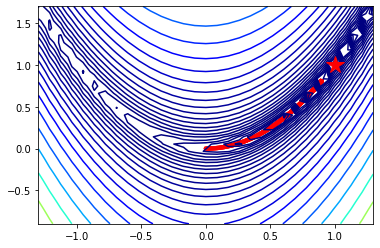

Best value of x: [0.8979067 0.8058023]
Number os steps: 1403


In [15]:
plotInfo(points, steps)